# Assignment 1

## Links
- https://cbscanvas.instructure.com/courses/41482/files/1504373?wrap=1
- https://insideairbnb.com/get-the-data/

## Approach
1. drop qualitative columns
### EDA
2. correlation analysis
3. graphing
### Clustering
4. choose clustering algorithm
5. run clustering algorithm
6. graph clusters
### PCA
7. run pca

In [2]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
# 1. drop qualitative columns
df_listings = pd.read_csv("listings.csv")
    
#df_reviews = pd.read_csv("reviews.csv")

In [4]:
df_listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,371299,Marais Rue des Archives refait à neuf février ...,1870265,Thomas,NaN,Hôtel-de-Ville,48.85751,2.35511,Entire home/apt,185.0,3,601,2024-09-06,3.97,3,307,54,7510300547558
1,371862,loft in Paris (Belleville),1872631,Veronique,NaN,Entrepôt,48.87151,2.37219,Entire home/apt,250.0,4,50,2023-08-14,0.34,1,9,0,7511000320406
2,372879,Appartement complet au centre de Paris.,1876396,Samuel,NaN,Gobelins,48.83593,2.35108,Entire home/apt,85.0,30,171,2024-08-15,2.01,3,151,1,"Available with a mobility lease only (""bail mo..."
3,375434,"Luxurious Art & Design Flat, 180m2, Champs Ely...",683140,Oscar,NaN,Élysée,48.86680,2.30972,Entire home/apt,NaN,3,22,2023-07-15,0.15,1,0,0,7510806561916
4,378897,Little flat near Montmartre,1902818,Lorraine,NaN,Opéra,48.88285,2.33462,Entire home/apt,110.0,3,28,2024-07-30,0.19,1,6,2,7511805895013


In [5]:
#df_listings.shape

In [6]:
df_listings.isna().sum()

id                                    0
name                                  0
host_id                               0
host_name                             6
neighbourhood_group               95461
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                             31231
minimum_nights                        0
number_of_reviews                     0
last_review                       27142
reviews_per_month                 27142
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           19447
dtype: int64

In [7]:
df_listings["neighbourhood"].unique()

array(['Hôtel-de-Ville', 'Entrepôt', 'Gobelins', 'Élysée', 'Opéra',
       'Batignolles-Monceau', 'Buttes-Montmartre', 'Reuilly', 'Temple',
       'Vaugirard', 'Ménilmontant', 'Popincourt', 'Buttes-Chaumont',
       'Passy', 'Luxembourg', 'Palais-Bourbon', 'Observatoire', 'Louvre',
       'Bourse', 'Panthéon'], dtype=object)

In [8]:
df_listings["room_type"].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [9]:
# delete irrelevant columns
cols_to_drop=["id", "name", "host_id", "host_name", "neighbourhood_group", "license"]
df_listings_clean = df_listings.drop(columns=cols_to_drop)

In [10]:
df_listings_clean.isna().sum()

neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                             31231
minimum_nights                        0
number_of_reviews                     0
last_review                       27142
reviews_per_month                 27142
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
dtype: int64

In [11]:
df_listings_price_clean = df_listings_clean.dropna(subset=["price"])
df_listings_price_clean.isna().sum()

neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       18176
reviews_per_month                 18176
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
dtype: int64

In [12]:
# fucntion that will assign numbers to unique non numerical values

def create_dict (col):
    d={}
    n=0
    for element in col.unique():
        d[element] = n
        n += 1
    return d

In [13]:
# apply fucntion to room type as well as neigbourhood columns:

dict1=create_dict(df_listings_price_clean["neighbourhood"])
print(dict1)

{'Hôtel-de-Ville': 0, 'Entrepôt': 1, 'Gobelins': 2, 'Opéra': 3, 'Buttes-Montmartre': 4, 'Reuilly': 5, 'Temple': 6, 'Batignolles-Monceau': 7, 'Ménilmontant': 8, 'Popincourt': 9, 'Passy': 10, 'Vaugirard': 11, 'Buttes-Chaumont': 12, 'Observatoire': 13, 'Louvre': 14, 'Bourse': 15, 'Luxembourg': 16, 'Élysée': 17, 'Panthéon': 18, 'Palais-Bourbon': 19}


In [14]:
dict2=create_dict(df_listings_price_clean["room_type"])
print(dict2)

{'Entire home/apt': 0, 'Private room': 1, 'Shared room': 2, 'Hotel room': 3}


In [15]:
df_listings_price_clean.loc[:,"neighbourhood"]=df_listings_price_clean["neighbourhood"].map(dict1)

In [16]:
df_listings_price_clean.loc[:,"room_type"]=df_listings_price_clean["room_type"].map(dict2)

In [17]:
df_listings_price_clean["neighbourhood"].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19], dtype=object)

In [18]:
df_listings_price_clean["room_type"].unique()

array([0, 1, 2, 3], dtype=object)

In [19]:
# Now we have numerical values, so we can see correlation easier. Used loc to not get the warning

In [20]:
df_listings_price_clean.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,48.85751,2.35511,0,185.0,3,601,2024-09-06,3.97,3,307,54
1,1,48.87151,2.37219,0,250.0,4,50,2023-08-14,0.34,1,9,0
2,2,48.83593,2.35108,0,85.0,30,171,2024-08-15,2.01,3,151,1
4,3,48.88285,2.33462,0,110.0,3,28,2024-07-30,0.19,1,6,2
5,1,48.86960,2.35307,0,300.0,13,6,2024-06-13,0.04,1,363,3


In [21]:
drop_more_cols = ["latitude", "longitude", "last_review",]
df_listings_cleaner = df_listings_price_clean.drop(columns=drop_more_cols)
df_listings_cleaner.head()

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,0,185.0,3,601,3.97,3,307,54
1,1,0,250.0,4,50,0.34,1,9,0
2,2,0,85.0,30,171,2.01,3,151,1
4,3,0,110.0,3,28,0.19,1,6,2
5,1,0,300.0,13,6,0.04,1,363,3


In [22]:
df_listings_cleaner.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64230 entries, 0 to 95460
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood                   64230 non-null  object 
 1   room_type                       64230 non-null  object 
 2   price                           64230 non-null  float64
 3   minimum_nights                  64230 non-null  int64  
 4   number_of_reviews               64230 non-null  int64  
 5   reviews_per_month               46054 non-null  float64
 6   calculated_host_listings_count  64230 non-null  int64  
 7   availability_365                64230 non-null  int64  
 8   number_of_reviews_ltm           64230 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 4.9+ MB


In [23]:
# 2. correlation analysis
## Convert column to list
for col in df_listings_cleaner.columns:
    
    col_list = df_listings_cleaner.loc[:, col].dropna().tolist()
## Calculate mean
    sum_col = sum(col_list)
    count_col = len(col_list)
    mean_col = round(sum_col / count_col,6)
        
## Calculate variance
    squared_dist = sum([(mean_col-x)**2 for x in col_list])
    var_col = squared_dist / count_col

## Calculate standard deviation  
    sd_col = var_col ** (1/2)

## print results
    print(f"Mean of {col} is {mean_col}")
    print(f"Variance of {col} is {var_col}")
    print(f"Standard Deviation of {col} is {sd_col}")

Mean of neighbourhood is 8.683575
Variance of neighbourhood is 26.898006714300852
Standard Deviation of neighbourhood is 5.186328828207951
Mean of room_type is 0.119306
Variance of room_type is 0.1629886506411378
Standard Deviation of room_type is 0.40371852897921073
Mean of price is 256.023276
Variance of price is 272763.9950210616
Standard Deviation of price is 522.2681256031825
Mean of minimum_nights is 10.628429
Variance of minimum_nights is 1632.1196339482249
Standard Deviation of minimum_nights is 40.3995004170624
Mean of number_of_reviews is 25.267601
Variance of number_of_reviews is 3739.2085704076717
Standard Deviation of number_of_reviews is 61.14906843450415
Mean of reviews_per_month is 1.35002
Variance of reviews_per_month is 2.0355042923789815
Standard Deviation of reviews_per_month is 1.4267110052070746
Mean of calculated_host_listings_count is 31.053884
Variance of calculated_host_listings_count is 11569.664183494051
Standard Deviation of calculated_host_listings_count i

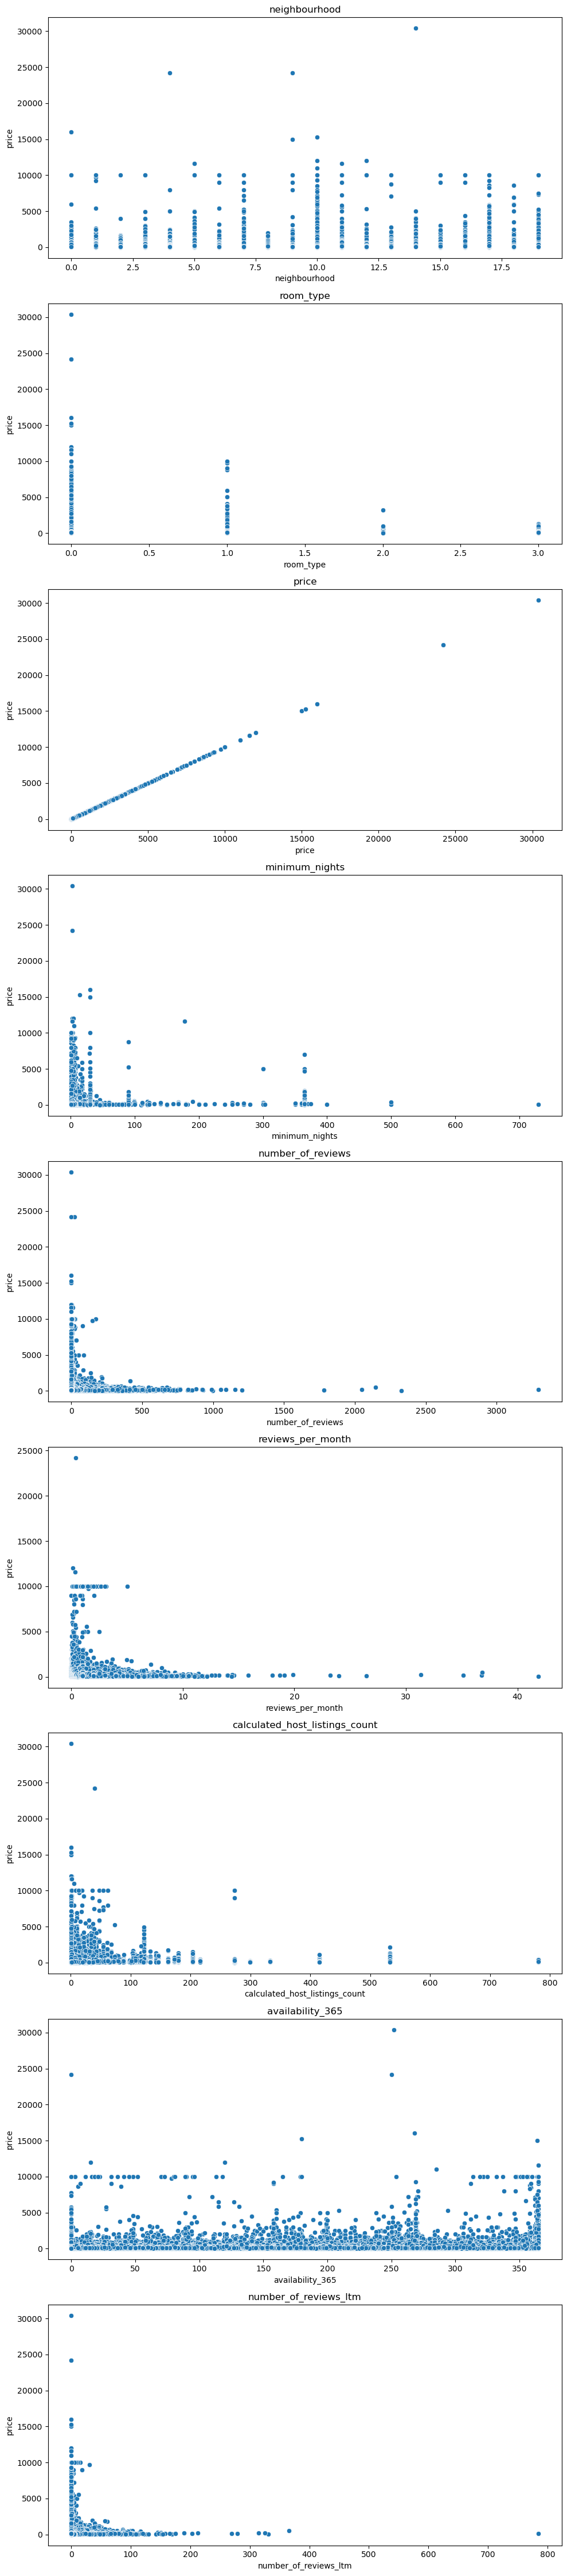

In [24]:
# now to create some scatterplots
fig, axes = plt.subplots(nrows=len(df_listings_cleaner.columns), ncols=1, figsize=(10, 5 * len(df_listings_cleaner.columns)))

for ax, col in zip(axes, df_listings_cleaner.columns):
    sns.scatterplot(data=df_listings_cleaner, y='price', x=col, ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

In [25]:
# okay, we can basically say we see clustering around each neigbourhood value as well as room type - obviously

# i will now argue, that room type and neigbourhood are both factors in increasing rental prices

In [26]:
# I will perform K-mean clustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [27]:
X = df_listings_cleaner[["price", "neighbourhood"]]
km = KMeans(n_clusters = 3, random_state = 42)
km.fit(X)

KMeans(n_clusters=3, random_state=42)

In [28]:
km.labels_
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([62239,   116,  1875]))

In [29]:
df_listings_cleaner['cluster'] = km.labels_
df_listings_cleaner.head()

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,cluster
0,0,0,185.0,3,601,3.97,3,307,54,0
1,1,0,250.0,4,50,0.34,1,9,0,0
2,2,0,85.0,30,171,2.01,3,151,1,0
4,3,0,110.0,3,28,0.19,1,6,2,0
5,1,0,300.0,13,6,0.04,1,363,3,0


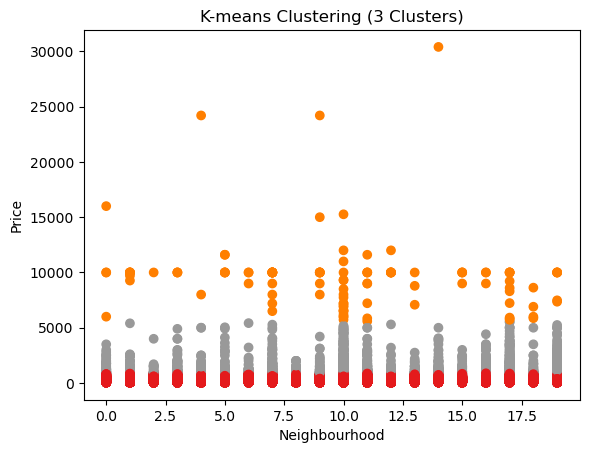

In [30]:
# now to graph the clusters

plt.scatter(X["neighbourhood"], X["price"], c=km.labels_, cmap = 'Set1')
plt.xlabel("Neighbourhood")
plt.ylabel("Price")
plt.title("K-means Clustering (3 Clusters)")
plt.show()

In [31]:
# or just use this function

In [32]:
def KmeansAndPlot(col1, col2, nClusters = 3):
    X = pd.concat([col1, col2], axis = 1)
    km = KMeans(n_clusters = nClusters, random_state = 1)
    km.fit(X)
    labels = km.labels_
    plt.scatter(col1, col2, c = labels, cmap = 'Set1')
    plt.title("K-means, {} clusters".format(nClusters))
    plt.xlabel(col1.name)
    plt.ylabel(col2.name)

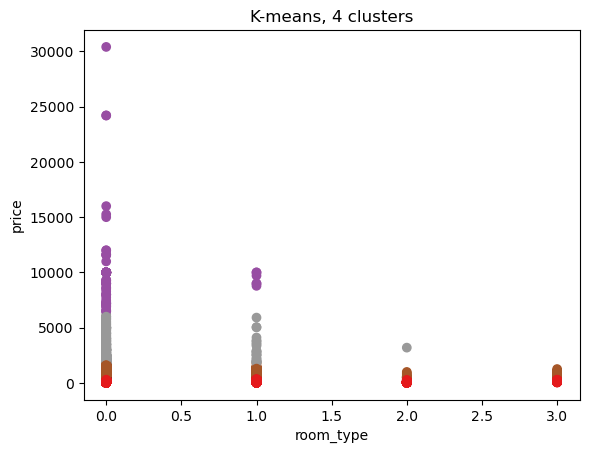

In [33]:
KmeansAndPlot(df_listings_cleaner.room_type, df_listings_cleaner.price, nClusters=4)

In [34]:
# And now for the PCA

# first some more cleaning since there are still NaN

mean_of_col = df_listings_cleaner['reviews_per_month'].mean()

# i will just make a new df with a shorter name
df_listings_new = df_listings_cleaner.copy()
df_listings_new['reviews_per_month'] = df_listings_new['reviews_per_month'].fillna(mean_of_col)

In [35]:
df_listings_new.isna().sum()

neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
cluster                           0
dtype: int64

In [36]:
features = ['neighbourhood', 'room_type', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm']
target = "price"

In [37]:
X = df_listings_new[features]
y = df_listings_new[target]

In [38]:
# Now to apply PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [39]:
# first principle component:
pc1 = pca.components_[0]

In [40]:
# Get feature names and their corresponding contributions to PC1
feature_contributions = pd.DataFrame(pc1, index=X.columns, columns=["PC1"])
print("Features contributing to the first principal component (PC1):")
print(feature_contributions )


# Sort the features by the absolute value of their contributions to PC1
sorted_features = feature_contributions.abs().sort_values(by="PC1", ascending=False)

# Get the names of the features that contribute to the first principal component
top_features = sorted_features.index.tolist()

# Print out the feature names sorted by contribution
print("Features contributing to the first principal component (PC1):")
print(top_features)

Features contributing to the first principal component (PC1):
                                     PC1
neighbourhood                   0.002163
room_type                       0.000125
minimum_nights                  0.058843
number_of_reviews               0.003253
reviews_per_month              -0.000120
calculated_host_listings_count  0.202969
availability_365                0.977401
number_of_reviews_ltm          -0.003673
Features contributing to the first principal component (PC1):
['availability_365', 'calculated_host_listings_count', 'minimum_nights', 'number_of_reviews_ltm', 'number_of_reviews', 'neighbourhood', 'room_type', 'reviews_per_month']


In [41]:
pc2 = pca.components_[1]

In [87]:
feature_contributions2 = pd.DataFrame(pc2, index=X.columns, columns=["PC2"])
print("Features contributing to the first principal component (PC1):")
print(feature_contributions2)


# Sort the features by the absolute value of their contributions to PC1
sorted_features2 = feature_contributions2.abs().sort_values(by="PC2", ascending=False)

# Get the names of the features that contribute to the first principal component
top_features2 = sorted_features2.index.tolist()

# Print out the feature names sorted by contribution
print("Features contributing to the first principal component (PC1):")
print(top_features)

Features contributing to the first principal component (PC1):
                                     PC2
neighbourhood                   0.002794
room_type                      -0.000269
minimum_nights                  0.023343
number_of_reviews              -0.057814
reviews_per_month              -0.000601
calculated_host_listings_count  0.976896
availability_365               -0.204123
number_of_reviews_ltm          -0.010590
Features contributing to the first principal component (PC1):
['availability_365', 'calculated_host_listings_count', 'minimum_nights', 'number_of_reviews_ltm', 'number_of_reviews', 'neighbourhood', 'room_type', 'reviews_per_month']
